In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks

In [42]:
data100 = pd.read_csv('./100.csv')

In [43]:
data100.head()

,'sample #','MLII','V5'
0,0,995,1011
1,1,995,1011
2,2,995,1011
3,3,995,1011
4,4,995,1011


In [44]:
volt_step = 10/(2**11)
data100["'MLII'"] = (data100["'MLII'"] * volt_step)
data100["'V5'"] = (data100["'V5'"] * volt_step)

In [45]:
data100.head()

,'sample #','MLII','V5'
0,0,4.858398,4.936523
1,1,4.858398,4.936523
2,2,4.858398,4.936523
3,3,4.858398,4.936523
4,4,4.858398,4.936523


In [46]:
data100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650000 entries, 0 to 649999
Data columns (total 3 columns):
'sample #'    650000 non-null int64
'MLII'        650000 non-null float64
'V5'          650000 non-null float64
dtypes: float64(2), int64(1)
memory usage: 14.9 MB


In [47]:
sec_step = 0.0027
sample_num = 650000
total_time = sec_step * sample_num

second = np.arange(0, total_time, sec_step)
second

array([0.0000000e+00, 2.7000000e-03, 5.4000000e-03, ..., 1.7549919e+03,
       1.7549946e+03, 1.7549973e+03])

plt.figure(figsize = (510,100))
plt.plot(second, data100["'MLII'"], 'r')

In [48]:
num = 100 ##행 개수
end = sec_step * num

data100_MLII = data100["'MLII'"]
data100_MLII -= data100["'MLII'"][0] ## MLII의 첫번째 행을 빼서 0으로 만듦
data100_MLII100 = data100_MLII.iloc[:num]
second_ = np.arange(0, end, sec_step)

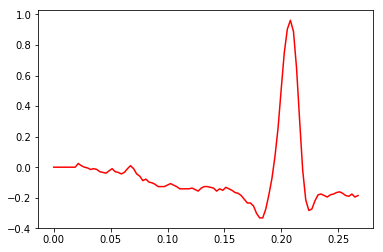

In [49]:
plt.plot(second_, data100_MLII100, 'r')

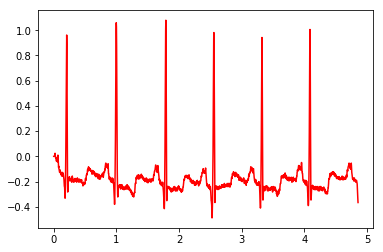

In [50]:
num = 1800
end = sec_step*num

data100_MLII800 = data100_MLII.iloc[:num]
second_2 = np.arange(0, end, sec_step)


plt.plot(second_2, data100_MLII800, 'r')

In [51]:
data100_MLII100

0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.000000
5     0.000000
6     0.000000
7     0.000000
8     0.024414
9     0.009766
10    0.000000
11   -0.004883
12   -0.014648
13   -0.009766
14   -0.014648
15   -0.029297
16   -0.034180
17   -0.039062
18   -0.024414
19   -0.009766
20   -0.029297
21   -0.034180
22   -0.043945
23   -0.034180
24   -0.009766
25    0.009766
26   -0.009766
27   -0.043945
28   -0.058594
29   -0.087891
        ...   
70   -0.180664
71   -0.073242
72    0.073242
73    0.258789
74    0.507812
75    0.747070
76    0.903320
77    0.961914
78    0.888672
79    0.649414
80    0.307617
81   -0.019531
82   -0.214844
83   -0.283203
84   -0.273438
85   -0.219727
86   -0.180664
87   -0.175781
88   -0.185547
89   -0.195312
90   -0.180664
91   -0.175781
92   -0.166016
93   -0.161133
94   -0.170898
95   -0.185547
96   -0.190430
97   -0.175781
98   -0.195312
99   -0.185547
Name: 'MLII', Length: 100, dtype: float64

In [52]:
print(data100_MLII800[67])
print(data100_MLII800[68])

-0.33203125
-0.33203125


In [53]:
R = find_peaks(data100_MLII800, prominence = 1)

R = R[0]
S = []
Q = []
for i in range(len(R)):
    a = R[i]
    while data100_MLII800[a] - data100_MLII800[a-1] >= 0:
        a -= 1
    Q.append(a)
    
    a = R[i]
    while data100_MLII800[a+1] - data100_MLII800[a] <= 0:
        a += 1
    S.append(a)

print(Q)
print(R)
print(S)

[67, 360, 654, 936, 1222, 1505]
[  77  370  663  947 1231 1515]
[83, 379, 669, 953, 1237, 1521]


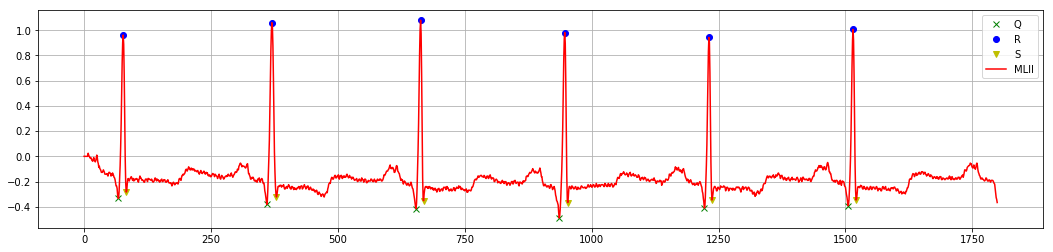

In [54]:
plt.figure(figsize=(18,4))
plt.plot(Q, data100_MLII800[Q], "xg")
plt.plot(R, data100_MLII800[R], "ob")
plt.plot(S, data100_MLII800[S], "vy")

plt.plot(data100_MLII800, "r")

plt.legend(['Q','R','S','MLII'],loc = 'upper right')
plt.grid()

# Window

beat = []

Q_val = []
R_val = []
S_val = []

window = 100

RR = []
Ratio = []

for i in range(len(R)):
    r_idx = R[i]
    r_val = data100_MLII800[r_idx]
    
    ECG = data100_MLII800
    
    beat.append(ECG.iloc[r_idx - window : r_idx + window])
    # ECG beat
    
    Q_val.append(ECG[Q[i]])
    R_val.append(ECG[R[i]])
    S_val.append(ECG[S[i]])
    # value
    
    if i > len(R)-2: RR.append(None)
    else: RR.append(R[i+1]-R[i])
    
#############
    if i > len(R)-2:
        RR[2].append(None)
    
    else:
        RR[2].append(R[i+1]-R[i])
    
    if i>1:
        RR[0].append(R[i-1]-R[i-2])
        RR[1].append(R[i]-R[i-1])
    elif i>0:
        RR[0].append(None)
        RR[1].append(R[i]-R[i-1])
    else:
        RR[0].append(None)
        RR[1].append(None)
    # RR        
    
    ECG = data100_MLII800/r_val
    # normalize
    
    A = []
    for j in range(Q[i],R[i]-1):
        if ECG[j]<0.5 and ECG[j+1]>=0.5:
            A.append(j)
            break
    for j in range(R[i],S[i]):
        if ECG[j]>0.5 and ECG[j+1]<=0.5:
            A.append(j)
            break       
    
    A = (A[1]-A[0])*sec_step
    # A
    
    
    

In [55]:
Q_val = []
R_val = []
S_val = []

window = 100

RR_ = [None,None]
A = []

for i in range(len(R)):
    r_idx = R[i]
    r_val = data100_MLII800[r_idx]
    
    ECG = data100_MLII800
    
    Q_val.append(ECG[Q[i]])
    R_val.append(ECG[R[i]])
    S_val.append(ECG[S[i]])
    # value(amplitude)
    
    if i > len(R)-2: RR_.append(None)
    else: RR_.append((R[i+1]-R[i])*sec_step)
    # RR        
    
    ECG = ECG/r_val
    # normalize
    
    for j in range(Q[i],R[i]-1):
        if ECG[j]<0.5 and ECG[j+1]>=0.5:
            A1 = j
            break
    for j in range(R[i],S[i]):
        if ECG[j]>0.5 and ECG[j+1]<=0.5:
            A2 = j
            break
    A.append((A2-A1)*sec_step)
    # A

In [56]:
print(RR_)
print(A)

[None, None, 0.7911, 0.7911, 0.7668, 0.7668, 0.7668, None]
[0.0162, 0.0189, 0.0162, 0.0162, 0.013500000000000002, 0.013500000000000002]


In [57]:
RR = [[],[],[],[]] #RR[0]:RR0, RR[1]:RR1, RR[2]:RR2, RR[3]:RRm
ratio = [[],[],[]] #ratio[0]:Ratio1, ratio[1]:Ratio2, ratio[2]:Ratio3

for i in range(len(R)):
    RR[0].append(RR_[i])
    RR[1].append(RR_[i+1])
    RR[2].append(RR_[i+2])
    
    m = 0
    c = 0
    if RR[2][i]!=None:
        m += RR[2][i]
        c += 1
    if RR[1][i]!=None:
        m += RR[1][i]
        c += 1
    if RR[0][i]!=None:
        m += RR[0][i]
        c += 1
    RR[3].append(m/c)

for i in range(len(R)):
    if RR[1][i]==None:
        for j in range(3):
            ratio[j].append(None)
    else:  
        for j in range(3):
            idx = j
            if j>0: idx +=1

            if RR[idx][i]==None:
                ratio[j].append(None)
            else:
                ratio[j].append(RR[idx][i]/RR[1][i])

In [58]:
print(len(RR[0]),len(RR[1]),len(RR[2]))
print(len(ratio[0]),len(ratio[1]),len(ratio[2]))
print(ratio)
print(RR[3])

6 6 6
6 6 6
[[None, None, 1.0, 1.0316901408450705, 1.0, 1.0], [None, 1.0, 0.9692832764505119, 1.0, 1.0, None], [None, 1.0, 0.9897610921501706, 1.0105633802816902, 1.0, 1.0]]
[0.7911, 0.7911, 0.783, 0.7749, 0.7668, 0.7668]


In [59]:
arr = {
#     "beat" : beat,
    "Q_idx" : Q, "R_idx" : R, "S_idx" : S,
    "Q" : Q_val, "R" : R_val, "S" : S_val,
    "RR0" : RR[0], "RR1":RR[1], "RR2":RR[2],
    "R0_1":ratio[0], "R2_1":ratio[1], "RM_1":ratio[2],
    "A" : A
}

arr = pd.DataFrame(arr)
arr

,Q_idx,R_idx,S_idx,Q,R,S,RR0,RR1,RR2,R0_1,R2_1,RM_1,A
0,67,77,83,-0.332031,0.961914,-0.283203,NaN,NaN,0.7911,NaN,NaN,NaN,0.0162
1,360,370,379,-0.380859,1.059570,-0.322266,NaN,0.7911,0.7911,NaN,1.000000,1.000000,0.0189
2,654,663,669,-0.415039,1.079102,-0.351562,0.7911,0.7911,0.7668,1.00000,0.969283,0.989761,0.0162
3,936,947,953,-0.488281,0.981445,-0.366211,0.7911,0.7668,0.7668,1.03169,1.000000,1.010563,0.0162
4,1222,1231,1237,-0.410156,0.942383,-0.346680,0.7668,0.7668,0.7668,1.00000,1.000000,1.000000,0.0135
5,1505,1515,1521,-0.390625,1.005859,-0.346680,0.7668,0.7668,NaN,1.00000,NaN,1.000000,0.0135


In [60]:
arr

,Q_idx,R_idx,S_idx,Q,R,S,RR0,RR1,RR2,R0_1,R2_1,RM_1,A
0,67,77,83,-0.332031,0.961914,-0.283203,NaN,NaN,0.7911,NaN,NaN,NaN,0.0162
1,360,370,379,-0.380859,1.059570,-0.322266,NaN,0.7911,0.7911,NaN,1.000000,1.000000,0.0189
2,654,663,669,-0.415039,1.079102,-0.351562,0.7911,0.7911,0.7668,1.00000,0.969283,0.989761,0.0162
3,936,947,953,-0.488281,0.981445,-0.366211,0.7911,0.7668,0.7668,1.03169,1.000000,1.010563,0.0162
4,1222,1231,1237,-0.410156,0.942383,-0.346680,0.7668,0.7668,0.7668,1.00000,1.000000,1.000000,0.0135
5,1505,1515,1521,-0.390625,1.005859,-0.346680,0.7668,0.7668,NaN,1.00000,NaN,1.000000,0.0135


In [61]:
arr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 13 columns):
Q_idx    6 non-null int64
R_idx    6 non-null int64
S_idx    6 non-null int64
Q        6 non-null float64
R        6 non-null float64
S        6 non-null float64
RR0      4 non-null float64
RR1      5 non-null float64
RR2      5 non-null float64
R0_1     4 non-null float64
R2_1     4 non-null float64
RM_1     5 non-null float64
A        6 non-null float64
dtypes: float64(10), int64(3)
memory usage: 704.0 bytes


In [62]:
arr.corr()

,Q_idx,R_idx,S_idx,Q,R,S,RR0,RR1,RR2,R0_1,R2_1,RM_1,A
Q_idx,1.000000,0.999999,0.999997,-0.477959,-0.220611,-0.738553,-0.895527,-0.865399,-0.868794,-0.260563,2.502677e-01,0.217186,-7.789725e-01
R_idx,0.999999,1.000000,0.999998,-0.478486,-0.220873,-0.738680,-0.894427,-0.866008,-0.868697,-0.258199,2.517072e-01,0.218756,-7.786404e-01
S_idx,0.999997,0.999998,1.000000,-0.478435,-0.219951,-0.738815,-0.894427,-0.866018,-0.867793,-0.258199,2.538591e-01,0.219204,-7.776039e-01
Q,-0.477959,-0.478486,-0.478435,1.000000,-0.019653,0.892797,-0.691223,0.411645,0.782780,-0.969189,-1.246626e-01,-0.622200,8.854141e-02
R,-0.220611,-0.220873,-0.219951,-0.019653,1.000000,-0.162753,0.563326,0.906476,0.087932,-0.240392,-6.557633e-01,-0.612613,5.682618e-01
S,-0.738553,-0.738680,-0.738815,0.892797,-0.162753,1.000000,-0.762493,0.563436,0.877784,-0.968496,1.781742e-01,-0.335812,3.148768e-01
RR0,-0.895527,-0.894427,-0.894427,-0.691223,0.563326,-0.762493,1.000000,0.577350,NaN,0.577350,-5.000000e-01,0.011029,1.000000e+00
RR1,-0.865399,-0.866008,-0.866018,0.411645,0.906476,0.563436,0.577350,1.000000,0.577350,-0.333333,-5.773503e-01,-0.643437,7.637626e-01
RR2,-0.868794,-0.868697,-0.867793,0.782780,0.087932,0.877784,NaN,0.577350,1.000000,NaN,3.333333e-01,-0.006367,6.454972e-01
R0_1,-0.260563,-0.258199,-0.258199,-0.969189,-0.240392,-0.968496,0.577350,-0.333333,NaN,1.000000,5.000000e-01,0.822814,5.773503e-01


In [19]:
R = []
Q = []
S = []
t_R = []
t_Q = []
t_S = []

In [20]:
print('R :', R)
print('Q :' ,Q)
print('S :' ,S)
print('t_R :', t_R)
print('t_Q :', t_Q)
print('t_S :', t_S)

R : []
Q : []
S : []
t_R : []
t_Q : []
t_S : []


In [21]:
R_R = []

In [22]:
for i in range(len(t_R)-1):
    R_R.append(t_R[i+1] - t_R[i])
R_R

[]

In [23]:
data100_2000 = data100.iloc[:2000]

In [24]:
second_3 = np.arange(0, 5.4, 0.0027)

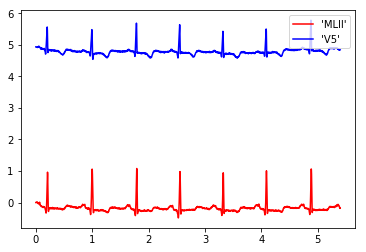

In [25]:
plt.plot(second_3, data100_2000["'MLII'"], 'r')
plt.plot(second_3, data100_2000["'V5'"], 'b')
plt.legend(loc= 'upper right')

In [26]:
data100_2500 = data100.iloc[:2500]

In [27]:
second_4 = np.arange(0, 6.75, 0.0027)

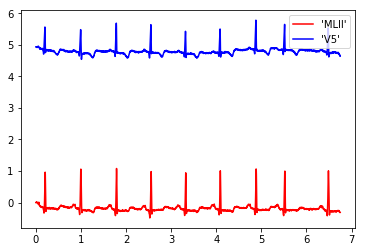

In [28]:
plt.plot(second_4, data100_2500["'MLII'"], 'r')
plt.plot(second_4, data100_2500["'V5'"], 'b')
plt.legend(loc= 'upper right')

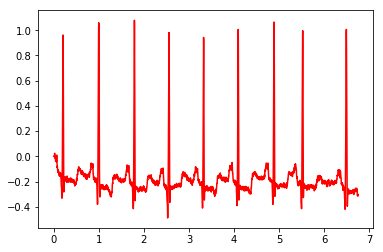

In [29]:
plt.plot(second_4, data100_2500["'MLII'"], 'r')